In [1]:
import numpy as np
import copy
import xesmf
import xarray as xr
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.path import Path
import matplotlib.patches as mpatches
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
def outline_nep_domain(ax,clon,clat):
    #NEP DOMAIN OUTLINE
    ax.plot(clon[0,:],clat[0,:],linewidth=lwid2,color='k',transform=ccrs.PlateCarree(),zorder=42)
    ax.plot(clon[:,0],clat[:,0],linewidth=lwid2,color='k',transform=ccrs.PlateCarree(),zorder=42)
    ax.plot(clon[-1,:],clat[-1,:],linewidth=lwid2,color='k',transform=ccrs.PlateCarree(),zorder=42)
    ax.plot(clon[:,-1],clat[:,-1],linewidth=lwid2,color='k',transform=ccrs.PlateCarree(),zorder=42)      

In [3]:
def outline_mask(mapid,mask_img,val):
    mapimg = (mask_img == val)
    ver_seg = np.where(mapimg[:,1:] != mapimg[:,:-1])
    hor_seg = np.where(mapimg[1:,:] != mapimg[:-1,:])

    l = []
    v = []
    # horizonal segments
    for p in zip(*hor_seg):
        v.append((clon[p[0]+1,p[1]],clat[p[0]+1,p[1]]))
        v.append((clon[p[0]+1,p[1]+1],clat[p[0]+1,p[1]+1]))

        l.append((np.nan,np.nan))
        v.append((np.nan,np.nan))
    #vertical segments
    for p in zip(*ver_seg):
        l.append((clon[p[0],p[1]+1],clat[p[0],p[1]+1]))
        l.append((clon[p[0]+1,p[1]+1],clat[p[0]+1,p[1]+1]))

        l.append((np.nan, np.nan))
        v.append((np.nan, np.nan))

    l_segments = np.array(l)
    v_segments = np.array(v)
    
    mapid.plot(l_segments[:,0], l_segments[:,1], color=(0,0,0), linewidth=.3,zorder=map_order+20)
    mapid.plot(v_segments[:,0], v_segments[:,1], color=(0,0,0), linewidth=.3,zorder=map_order+20)

In [4]:
region_dict = {'goc':{'title':'Gulf of California', 
                      'points': [(244,32),(250,23),(254,23),(247,32),(244,32)]},
               'sccs':{'title':'Southern CCS',
                       'points': [(243,32.53),   (243,34.45),   (238,34.45),  (238,32.53),   (243,32.53)]},
               'cccs':{'title':'Central CCS',
                       'points': [(240,34.45),   (240,40.44),   (234,40.44),  (234,34.45),   (240,34.45)]},
               'nccs':{'title':'Northern CCS',
                       'points': [(236.5,40.44), (236.5,48.4),  (235.34,48.4),(231.9,46),    (231.9,40.44),
                                  (236.5,40.44)]},
               'bc':  {'title':'British Columbia',
                       'points': [(240,48.14),   (230.5,54.76), (221.1,53.46),(231.9,46),    (235.34,48.4),
                                  (240,48.14)]},
               'goa': {'title':'Gulf of Alaska',
                       'points': [(230.5,54.76), (220,61.55),   (207.4,61.51),(201.74,56.62),(199.5,55.5),
                                  (210,53.46),   (221.1,53.46), (230.5,54.76)]},
               'ber': {'title':'Bering Sea',
                       'points': [(203.59,58.91),(201.31,65.44),(191,65.76),  (169.14,53.18),(173.18,52.81),
                                  (179.51,51.78),(186.81,52.16),(193.05,53.65),(199.2,55.63),(202.98,57.47),
                                  (203.59,58.91),]}
              }

In [5]:
gridfil = '/work/role.medgrp/NEP/plotting/shared_files/NEP_ocean_static_nomask.nc'

grd_fid = nc.Dataset(gridfil)
nep_clat = grd_fid.variables['geolat_c'][:]
nep_clon = grd_fid.variables['geolon_c'][:]
nep_lat = grd_fid.variables['geolat'][:]
nep_lon = grd_fid.variables['geolon'][:]

depth = grd_fid.variables['deptho'][:]

wet = grd_fid.variables['wet'][:]

mask_var = copy.deepcopy(wet)
mask_var[mask_var>0]=1
mask_var[mask_var==0]=99999
#mask_var[lat>66]=99999

map_order=10
map_offset=.4

ber
goa
bc
nccs
cccs
sccs


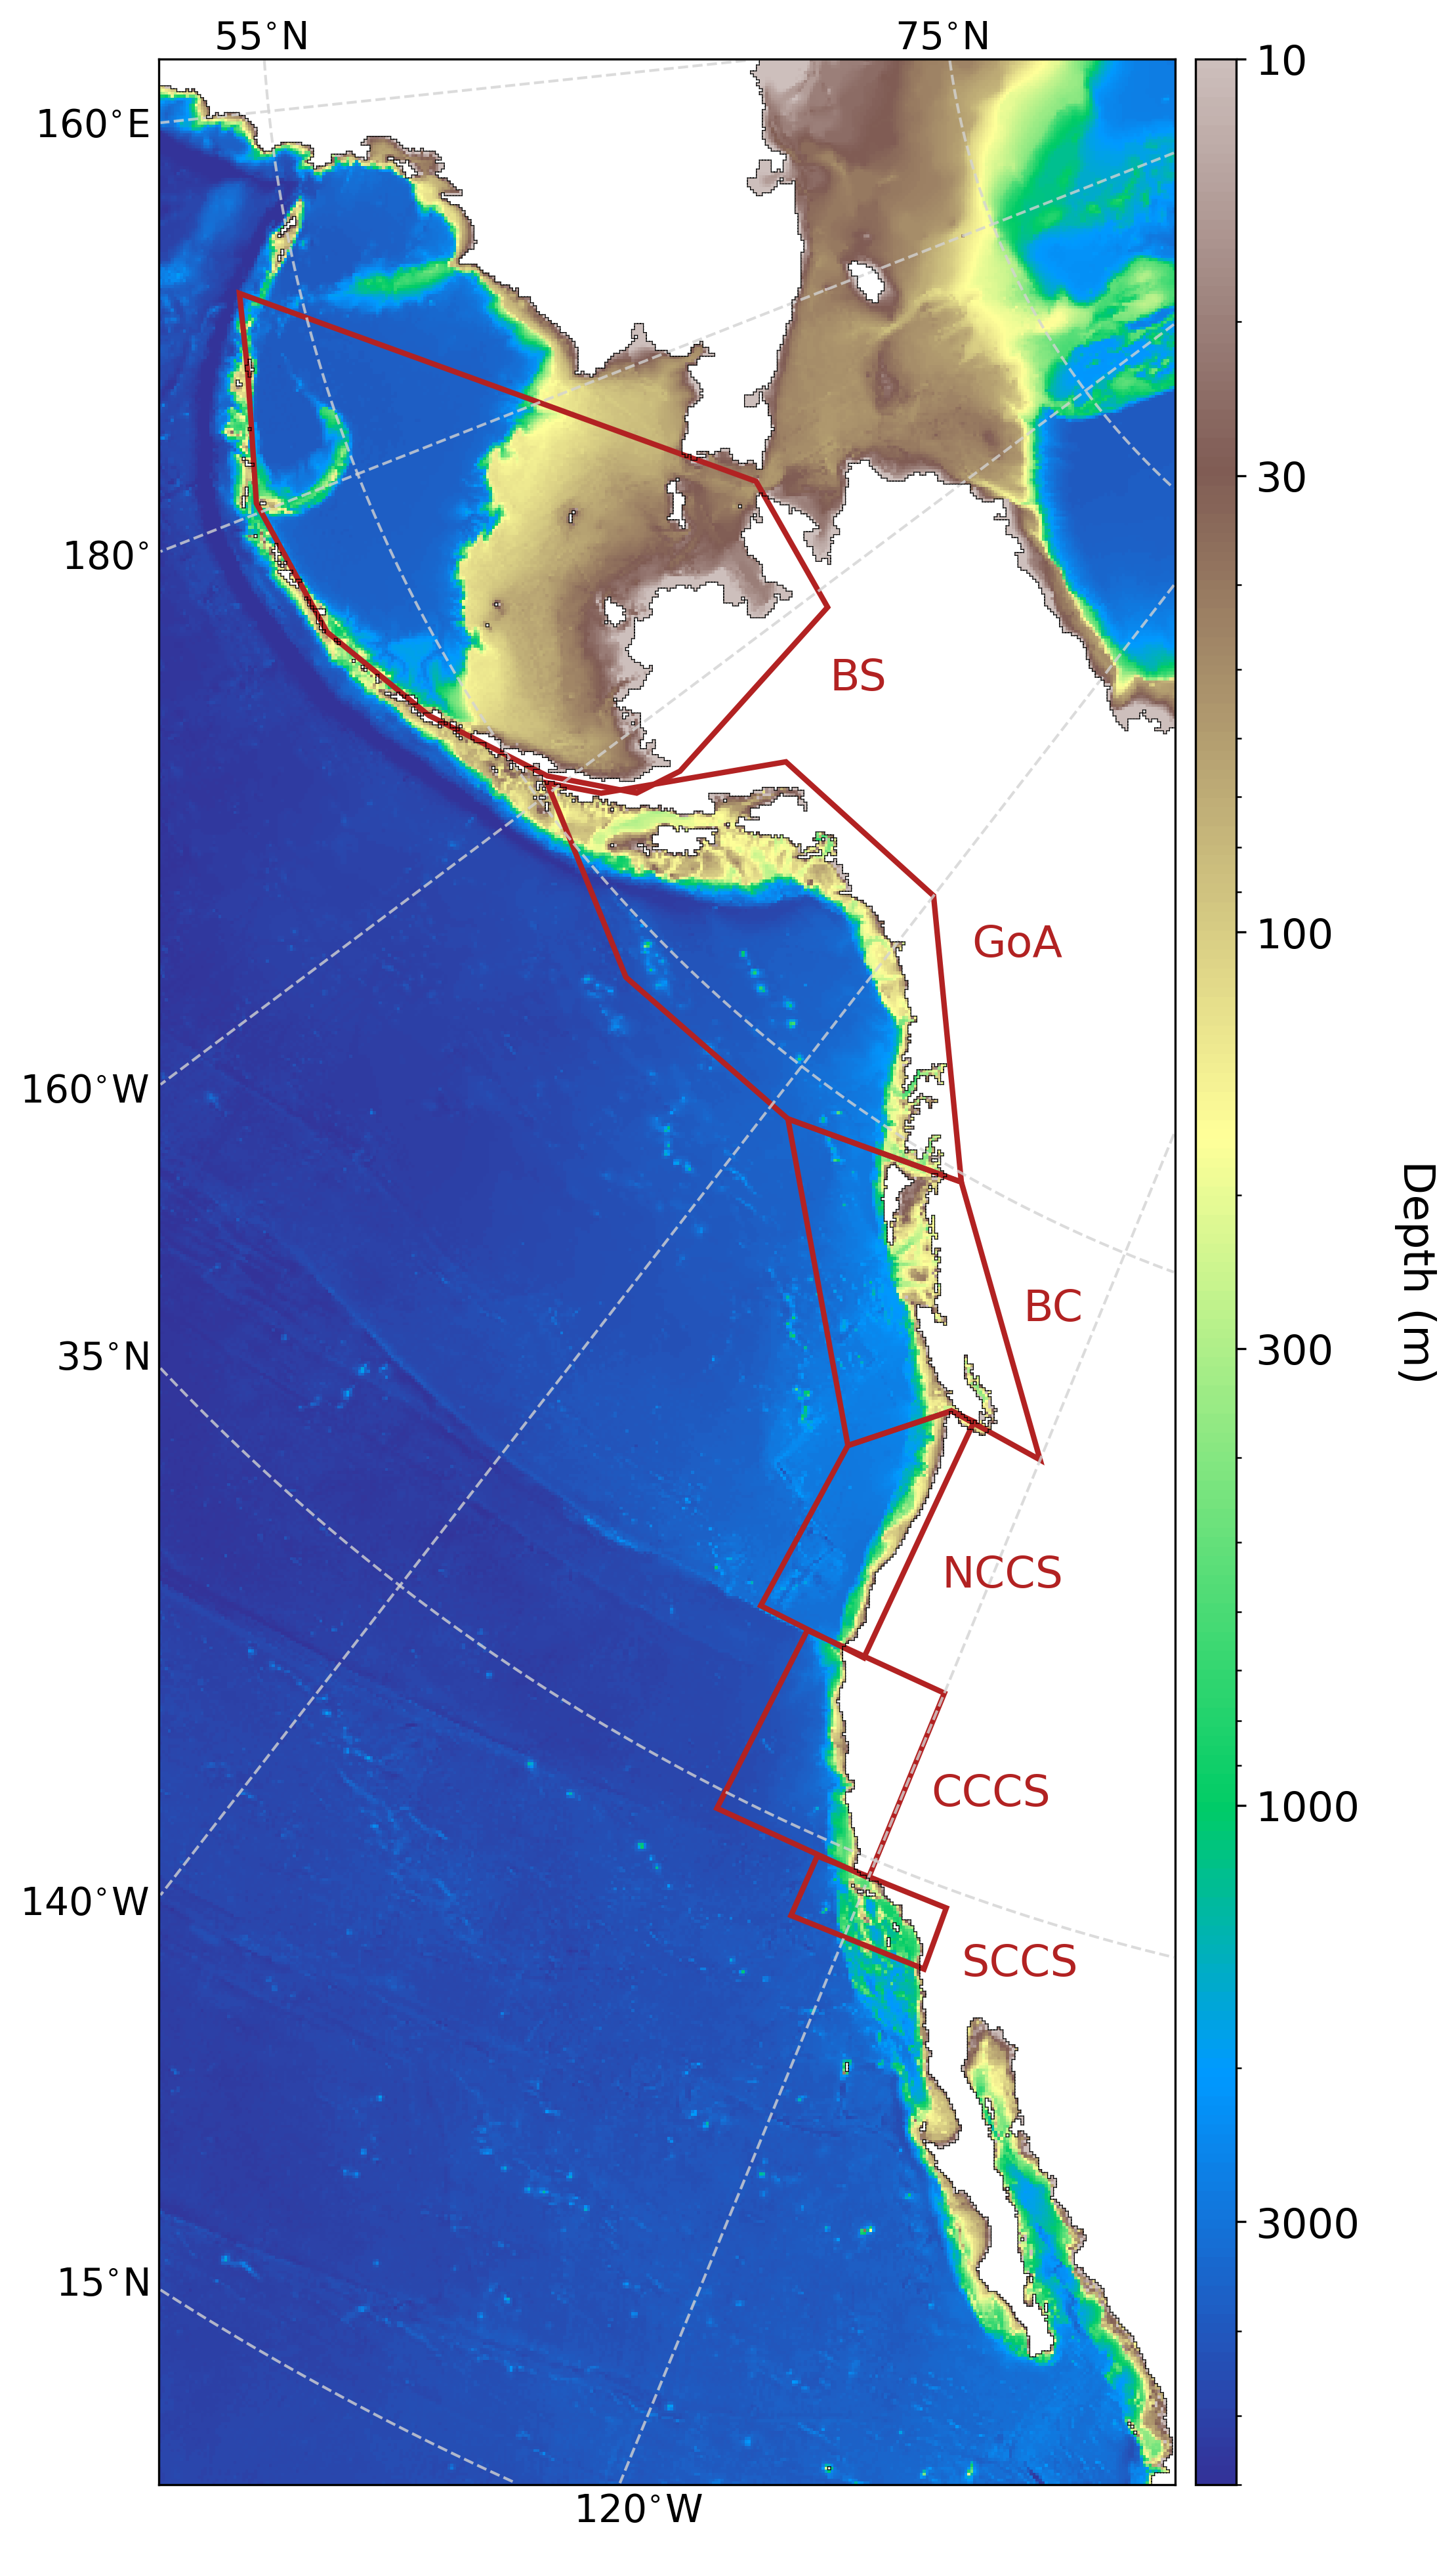

In [6]:
lat = np.arange(depth.shape[0])
lon = np.arange(depth.shape[1])
index_lons, index_lats = np.meshgrid(lon.astype(float),lat.astype(float))

nep_grid = xr.Dataset()
nep_grid['lat'] = xr.DataArray(data=nep_lat, dims=("ny","nx"))
nep_grid['lon'] = xr.DataArray(data=nep_lon, dims=("ny","nx"))

clon,clat = np.meshgrid(np.arange(-.5,depth.shape[1]+.5,1),np.arange(-.5,depth.shape[0]+.5,1))

fig = plt.figure(figsize=(10, 16),dpi=300)
ax = fig.add_subplot(111)

nrow=129
terrain_subset = plt.cm.terrain_r(np.linspace(.1, 1, 3*nrow))
cmap = mcolors.LinearSegmentedColormap.from_list('terrain_subset', terrain_subset)
norm = mcolors.LogNorm(vmin=10,vmax=6000)

C = ax.pcolormesh(clon,clat,depth,cmap=cmap,norm=norm)

lat_levs = np.array([15,35,55,75])
lon_levs = np.array([160,180,200,220,240,260])

# latitudes
cs_lat = ax.contour(lon,lat,nep_lat,lat_levs,colors='lightgrey',alpha=0.8,linewidths=1,linestyles='dashed')

# longitudes contours
cs_lon = ax.contour(lon,lat,nep_lon,lon_levs,colors='lightgrey',alpha=0.8,linewidths=1,linestyles='dashed')

outline_mask(ax,mask_var,1)

ax.set_xticks
ax.set(xlim=(-.5,depth.shape[1]-.5), ylim=(-.5,depth.shape[0]-.5))

plt.gca().set_aspect('equal')
plt.tick_params(
    axis='both',          
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)

# Add polygons for regional analyses
for nr in ['ber', 'goa', 'bc', 'nccs','cccs','sccs']:
    print(nr)
    poly_corners = np.array(region_dict[nr]['points'])
    lons = []
    lats = []
    
    for point in poly_corners:
        lons = np.append(lons,point[0])
        lats = np.append(lats,point[1])
        
    # set up regridder for specific polygon
    point_locs = xr.Dataset()
    point_locs['lon'] = xr.DataArray(data=lons, dims=('points'))
    point_locs['lat'] = xr.DataArray(data=lats, dims=('points'))
    
    nep_regridder = xesmf.Regridder(nep_grid, point_locs, 'bilinear', 
                                    locstream_out=True)
    
    new_lons = nep_regridder(index_lons)
    new_lats = nep_regridder(index_lats)
    
    poly_corners = np.hstack((new_lons[:,np.newaxis].reshape(len(lons),1),new_lats[:,np.newaxis].reshape(len(lats),1)))
    poly = mpatches.Polygon(poly_corners,closed=True, ec='firebrick', fill=False, 
                            lw=2, fc=None)
    ax.add_patch(poly)

# region labels
ax.text(.66,.74,'BS',transform=ax.transAxes,fontsize = 16,color = 'firebrick',zorder=50,horizontalalignment='left')
ax.text(.8,.63,'GoA',transform=ax.transAxes,fontsize = 16,color = 'firebrick',zorder=50,horizontalalignment='left')
ax.text(.85,.48,'BC',transform=ax.transAxes,fontsize = 16,color = 'firebrick',zorder=50,horizontalalignment='left')
ax.text(.77,.37,'NCCS',transform=ax.transAxes,fontsize = 16,color = 'firebrick',zorder=50,horizontalalignment='left')
ax.text(.76,.28,'CCCS',transform=ax.transAxes,fontsize = 16,color = 'firebrick',zorder=50,horizontalalignment='left')
ax.text(.79,.21,'SCCS',transform=ax.transAxes,fontsize = 16,color = 'firebrick',zorder=50,horizontalalignment='left')
    
# Latitude labels
ax.text(.77,1.001,r'75$^{\circ}$N',transform=ax.transAxes,fontsize = 14,zorder=50,ha='center',va='bottom')
ax.text(.1,1.001,r'55$^{\circ}$N',transform=ax.transAxes,fontsize = 14,zorder=50,ha='center',va='bottom')
ax.text(-.01,.46,r'35$^{\circ}$N',transform=ax.transAxes,fontsize = 14,zorder=50,ha='right')
ax.text(-.01,.078,r'15$^{\circ}$N',transform=ax.transAxes,fontsize = 14,zorder=50,ha='right')

# Longitude labels
ax.text(-.01,.968,r'160$^{\circ}$E',transform=ax.transAxes,fontsize = 14,zorder=50,ha='right')
ax.text(-.01,.79,r'180$^{\circ}$',transform=ax.transAxes,fontsize = 14,zorder=50,ha='right')
ax.text(-.01,.57,r'160$^{\circ}$W',transform=ax.transAxes,fontsize = 14,zorder=50,ha='right')
ax.text(-.01,.235,r'140$^{\circ}$W',transform=ax.transAxes,fontsize = 14,zorder=50,ha='right')
ax.text(.535,-0.003,r'120$^{\circ}$W',transform=ax.transAxes,fontsize = 14,zorder=50,ha='right',va='top')

pos = ax.get_position()
cax = fig.add_axes([pos.x0+1.02*pos.width, pos.y0, .04*pos.width, pos.height])
cax.invert_yaxis()
cbar = plt.colorbar(C,cax=cax)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_yticks([10,30,100,300,1000,3000])
cbar.ax.set_yticklabels([10,30,100,300,1000,3000])
cbar.set_label('Depth (m)', rotation=270,labelpad=28,fontsize=16)

plt.savefig('Figure1_NEP10k_domain')